### About the Dataset:

- id: unique id for a news article
- title: the title of a news article
- text: the text of the article; could be incomplete
- label: a label that marks whether the news article is real or fake:
   * 1: Fake news
   * 0: real News

### Importing the Dependencies


In [37]:
import numpy as np
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordClou
from collections import Counter

In [36]:
pip install wordcloud


     ------------------------------------ 300.0/300.0 kB 133.4 kB/s eta 0:00:00


In [38]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [2]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\sushma and
[nltk_data]     sowmya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
# printing the stopwords in English
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

### Data Pre-processing


In [4]:
# loading the dataset to a pandas DataFrame
news_dataset = pd.read_csv('WELFake_Dataset.csv')

In [5]:
news_dataset.shape

(72134, 4)

In [6]:
# print the first 5 rows of the dataframe
news_dataset.head()

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [7]:
# counting the number of missing values in the dataset
news_dataset.isnull().sum()

Unnamed: 0      0
title         558
text           39
label           0
dtype: int64

In [8]:
# replacing the null values with empty string
news_dataset = news_dataset.fillna('')

In [9]:
print(news_dataset['title'])

0        LAW ENFORCEMENT ON HIGH ALERT Following Threat...
1                                                         
2        UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...
3        Bobby Jindal, raised Hindu, uses story of Chri...
4        SATAN 2: Russia unvelis an image of its terrif...
                               ...                        
72129    Russians steal research on Trump in hack of U....
72130     WATCH: Giuliani Demands That Democrats Apolog...
72131    Migrants Refuse To Leave Train At Refugee Camp...
72132    Trump tussle gives unpopular Mexican leader mu...
72133    Goldman Sachs Endorses Hillary Clinton For Pre...
Name: title, Length: 72134, dtype: object


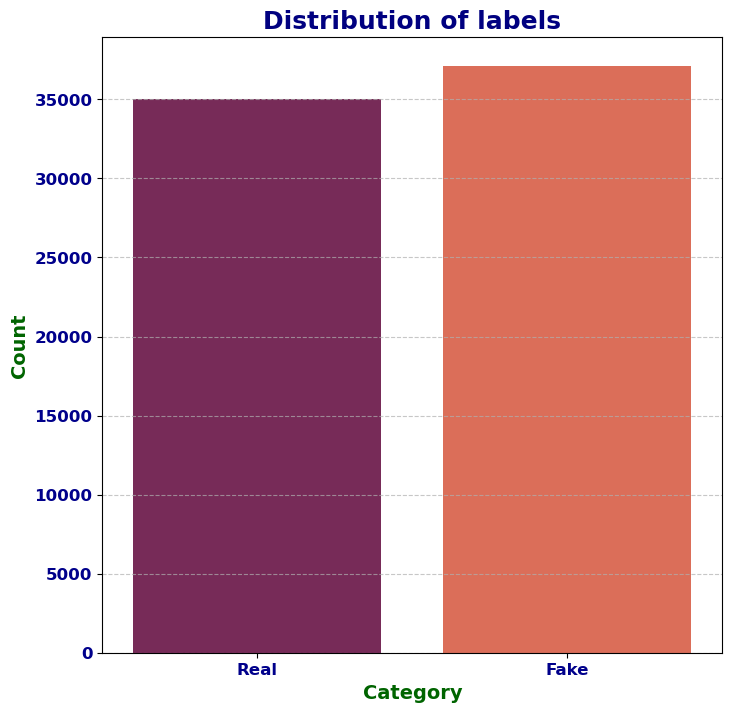

In [13]:
# Distribution of Categories

plt.figure(figsize=(8,8))
sns.countplot(x='label',data=news_dataset, palette='rocket')
plt.title('Distribution of labels', fontsize=18, fontweight='bold', color='navy')
plt.xlabel('Category', fontsize=14, fontweight='bold', color='darkgreen')
plt.ylabel('Count', fontsize=14, fontweight='bold', color='darkgreen')
plt.xticks(ticks=[0, 1], labels=['Real', 'Fake'], fontsize=12, fontweight='bold', color='darkblue')
plt.yticks(fontsize=12, fontweight='bold', color='darkblue')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show() 

In [14]:
# separating the data & label
X = news_dataset.drop(columns='label', axis=1)
Y = news_dataset['label']

In [15]:
print(X)
print(Y)

       Unnamed: 0                                              title  \
0               0  LAW ENFORCEMENT ON HIGH ALERT Following Threat...   
1               1                                                      
2               2  UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...   
3               3  Bobby Jindal, raised Hindu, uses story of Chri...   
4               4  SATAN 2: Russia unvelis an image of its terrif...   
...           ...                                                ...   
72129       72129  Russians steal research on Trump in hack of U....   
72130       72130   WATCH: Giuliani Demands That Democrats Apolog...   
72131       72131  Migrants Refuse To Leave Train At Refugee Camp...   
72132       72132  Trump tussle gives unpopular Mexican leader mu...   
72133       72133  Goldman Sachs Endorses Hillary Clinton For Pre...   

                                                    text  
0      No comment is expected from Barack Obama Membe...  
1         Did the

### Stemming:

- Stemming is the process of reducing a word to its Root word

* example: actor, actress, acting --> act
- Here's an example with the word "running":
  * Running (original word)
  * Run (stemmed word)
* In this case, "running" has been reduced to its root form "run." This allows a program to recognize "running," "runs," and "ran" as variations of the same word.

In [16]:
port_stem=PorterStemmer()


In [17]:
def stemming(content):
    stemmed_content=re.sub('[^a-zA-Z]',' ',content) # Removes non-alphabetic characters
    stemmed_content=stemmed_content.lower() # Converts to lowercase
    stemmed_content=stemmed_content.split()  # Tokenization step (splits text into words)
    stemmed_content=[port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]  # Stemming and stop-word removal
    stemmed_content=' '.join(stemmed_content) # Joins the tokens back into a single string
    return stemmed_content

In [18]:
news_dataset['content'] = news_dataset['title'].apply(stemming)

In [19]:
print(news_dataset['content'])

0        law enforc high alert follow threat cop white ...
1                                                         
2        unbeliev obama attorney gener say charlott rio...
3        bobbi jindal rais hindu use stori christian co...
4        satan russia unv imag terrifi new supernuk wes...
                               ...                        
72129    russian steal research trump hack u democrat p...
72130    watch giuliani demand democrat apolog trump ra...
72131         migrant refus leav train refuge camp hungari
72132    trump tussl give unpopular mexican leader much...
72133           goldman sach endors hillari clinton presid
Name: content, Length: 72134, dtype: object


In [20]:
#separating the data and label
X = news_dataset['content'].values
Y = news_dataset['label'].values

In [21]:
print(X)
print(Y)

['law enforc high alert follow threat cop white blacklivesmatt fyf terrorist video'
 ''
 'unbeliev obama attorney gener say charlott rioter peac protest home state north carolina video'
 ... 'migrant refus leav train refuge camp hungari'
 'trump tussl give unpopular mexican leader much need shot arm'
 'goldman sach endors hillari clinton presid']
[1 1 1 ... 0 0 1]


In [22]:
Y.shape

(72134,)

In [23]:
# converting the textual data to numerical data
vectorizer = TfidfVectorizer()
vectorizer.fit(X)

X = vectorizer.transform(X)

### Splitting the dataset to training & test data

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify=Y, random_state=2)

### Training the Model: Logistic Regression

In [26]:
model = LogisticRegression()

In [27]:
model.fit(X_train, Y_train)

LogisticRegression()

### Evaluation

In [28]:
# accuracy score on the training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [29]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.9199403885143916


In [30]:
# accuracy score on the training data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [31]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.900603035974215


### Making a Predictive System

In [40]:
X_new = X_test[0]

prediction = model.predict(X_new)
print(prediction)

if (prediction[0]==0):
  print('The news is Real')
else:
  print('The news is Fake')

[1]
The news is Fake


In [41]:
print(Y_test[0])

1


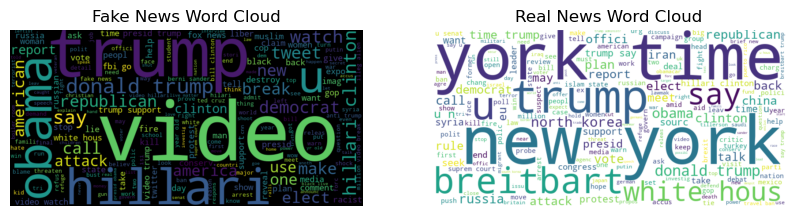

In [39]:
# Visualizations

## 1. Word Clouds for Fake vs. Real News
fake_news = news_dataset[news_dataset['label'] == 1]['content']
real_news = news_dataset[news_dataset['label'] == 0]['content']

fake_wordcloud = WordCloud(width=800, height=400, background_color='black').generate(' '.join(fake_news))
real_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(real_news))

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(fake_wordcloud, interpolation='bilinear')
plt.title('Fake News Word Cloud')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(real_wordcloud, interpolation='bilinear')
plt.title('Real News Word Cloud')
plt.axis('off')
plt.show()


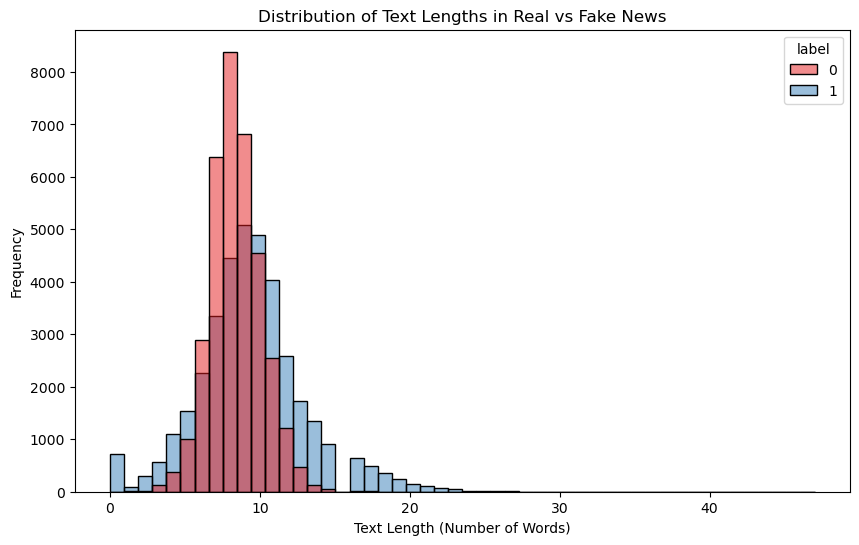

In [48]:

## 2. Distribution of Text Lengths
news_dataset['text_length'] = news_dataset['content'].apply(lambda x: len(x.split()))
plt.figure(figsize=(10,6))
sns.histplot(data=news_dataset, x='text_length', hue='label', kde=False, palette='Set1', bins=50)
plt.title('Distribution of Text Lengths in Real vs Fake News')
plt.xlabel('Text Length (Number of Words)')
plt.ylabel('Frequency')
plt.show()


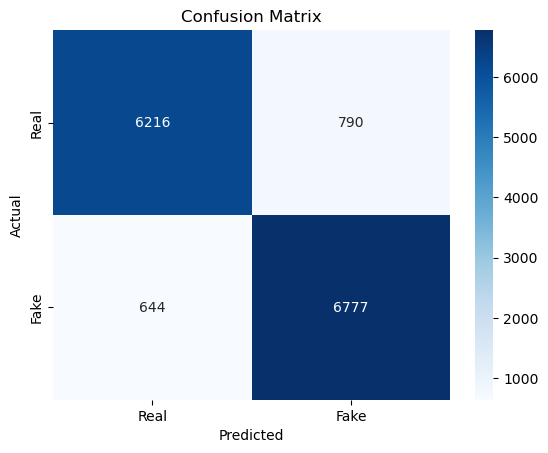

In [41]:

## 3. Confusion Matrix
conf_matrix = confusion_matrix(Y_test, X_test_prediction)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [56]:
# Function to get the top TF-IDF words for Fake (1) and Real (0) news
def top_tfidf_words(label, top_n=20):
    X_label = X_train[Y_train == label].toarray()  # Convert sparse to dense
    avg_tfidf = np.mean(X_label, axis=0)
    indices = avg_tfidf.argsort()[::-1][:top_n]
    top_words = [vectorizer.get_feature_names_out()[index] for index in indices]
    top_tfidf_values = avg_tfidf[indices]
    return top_words, top_tfidf_values

# Get top words and their TF-IDF values for fake and real news
fake_top_words, fake_top_tfidf_values = top_tfidf_words(1)
real_top_words, real_top_tfidf_values = top_tfidf_words(0)


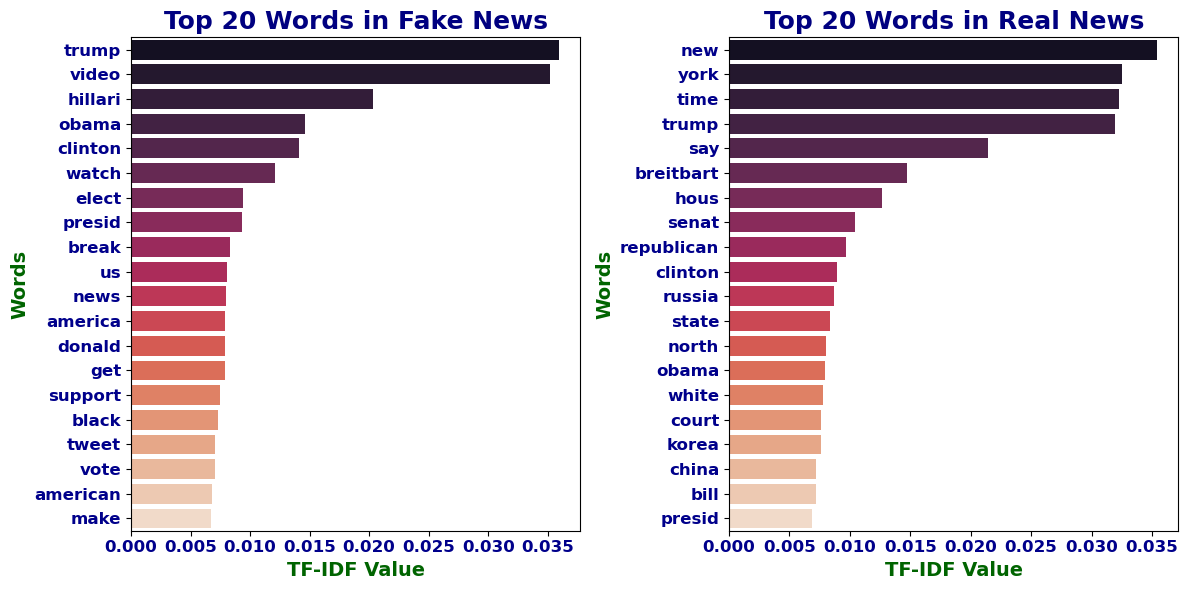

In [52]:
# Plotting the top 20 words for Fake and Real news
plt.figure(figsize=(12, 6))

# Plot for Fake News
plt.subplot(1, 2, 1)
sns.barplot(x=fake_top_tfidf_values[::], y=fake_top_words[::], palette='rocket')
plt.title('Top 20 Words in Fake News', fontsize=18, fontweight='bold', color='navy')
plt.xlabel('TF-IDF Value', fontsize=14, fontweight='bold', color='darkgreen')
plt.ylabel('Words', fontsize=14, fontweight='bold', color='darkgreen')
plt.xticks(fontsize=12, fontweight='bold', color='darkblue')
plt.yticks(fontsize=12, fontweight='bold', color='darkblue')

# Plot for Real News
plt.subplot(1, 2, 2)
sns.barplot(x=real_top_tfidf_values[::], y=real_top_words[::], palette='rocket')
plt.title('Top 20 Words in Real News', fontsize=18, fontweight='bold', color='navy')
plt.xlabel('TF-IDF Value', fontsize=14, fontweight='bold', color='darkgreen')
plt.ylabel('Words', fontsize=14, fontweight='bold', color='darkgreen')
plt.xticks(fontsize=12, fontweight='bold', color='darkblue')
plt.yticks(fontsize=12, fontweight='bold', color='darkblue')

plt.tight_layout()
plt.show()

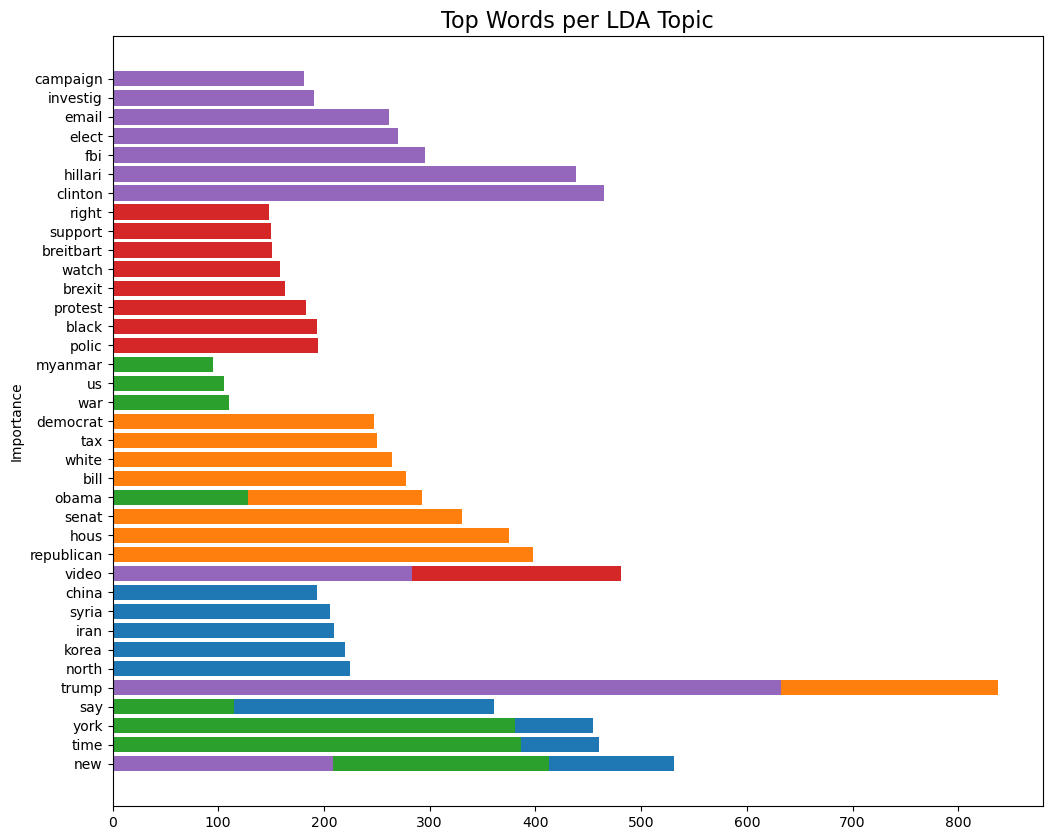

In [47]:
## 5. Topic Modeling using LDA
lda = LatentDirichletAllocation(n_components=5, random_state=42)
X_topics = lda.fit_transform(X)

def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(1, 1, figsize=(12, 10), sharex=True)
    axes.set_title(title, fontsize=16)
    axes.set_ylabel('Importance')
    for topic_idx, topic in enumerate(model.components_):
        top_features_indices = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_indices]
        top_weights = topic[top_features_indices]
        axes.barh(top_features, top_weights)
    plt.show()

plot_top_words(lda, vectorizer.get_feature_names_out(), 10, "Top Words per LDA Topic")